In [1]:
from os import getcwd
import os.path as path 

import matplotlib.pyplot as plt
import matplotlib.colors as mpc
import numpy as np
import pickle

from src.models.weights import classical_weights, V1_weights, sensilla_weights
from src.data.load_dataset import generate_frequency_XOR, load_mnist

In [2]:
data_dir = path.abspath(path.join(getcwd(), '../../'))

(-7.45, 156.45, -2.556110464313355, 2.1309339110648806)

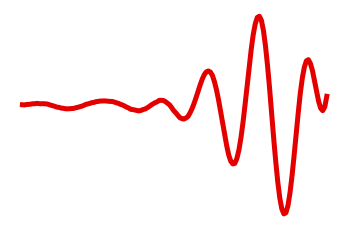

In [3]:
# generate sensilla weights
omega_a, omega_b, gamma = 30, 80, 0.02
W = sensilla_weights(20, 150, 1500, 0.1,omega_a, omega_b, gamma, seed=20)

fig = plt.figure()
plt.plot(W[7], lw=5, c='#e50000')
plt.axis('off')
# plt.savefig(data_dir + '/reports/figures/paper_figs/figure_1/sensilla_weights.pdf', dpi=300, transparent=True)

(-7.45, 156.45, -2.7878985432711083, 3.012975485835471)

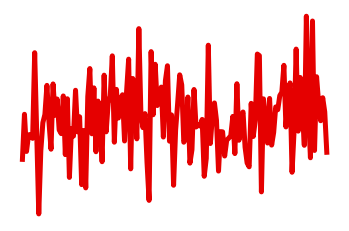

In [12]:
# generate classical sensilla weights
W = classical_weights(20, 150, seed=20)

fig = plt.figure()
plt.plot(W[2], lw=5, c='#e50000')
plt.axis('off')
# plt.savefig(data_dir + '/reports/figures/paper_figs/figure_1/classical_weights_tseries.pdf', 
#             dpi=300, transparent=True, pad_inches=0.0)

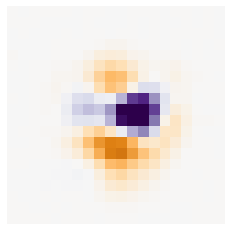

In [38]:
# generate V1 weights
dim = (20, 20)
s, f, c = 2.5, 2, (10, 10)
W = V1_weights(100, dim, s, f, c, seed=0)

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
plt.imshow(W[19].reshape(dim), cmap='PuOr') #7
plt.clim(-5, 5)
plt.axis('off')
plt.savefig(data_dir + '/reports/figures/paper_figs/figure_1/v1_weights.pdf', 
            dpi=300, transparent=True, 
            bbox_inches = 'tight', pad_inches = 0)

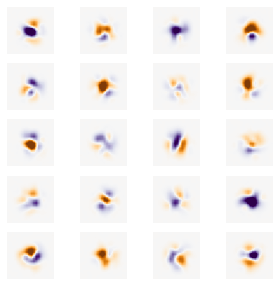

In [34]:
fig = plt.figure(figsize=(5, 5))
for i in range(20):
    ax = fig.add_subplot(5, 4, i + 1)
    plt.imshow(W[i].reshape(dim), cmap='PuOr')
    plt.clim(-5, 5)
    plt.axis('off')

(-0.5, 19.5, 19.5, -0.5)

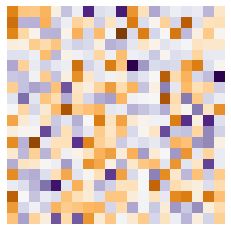

In [37]:
## generate classical image weights
dim = (20, 20)
W = classical_weights(20, dim, seed=20)

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
plt.imshow(W[7].reshape(dim), cmap='PuOr')
# plt.clim(-5, 5)
plt.axis('off')
# plt.savefig(data_dir + '/reports/figures/psaper_figs/figure_1/classical_weights_images.pdf', 
#             dpi=300, transparent=True, 
#             bbox_inches = 'tight', pad_inches = 0)

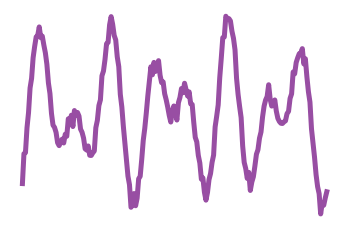

In [4]:
# generate time-series example
num_samples, sampling_rate, duration, freq1, freq2, snr, seed = 100, 2000, 0.1, 50, 80, .995, 5
data, labels = generate_frequency_XOR(num_samples, sampling_rate, freq1, freq2,
                                          duration, snr, seed)

fig = plt.figure()
plt.plot(data[labels==0][0], lw=5, c='#984ea3')
plt.axis('off')
plt.savefig(data_dir + '/reports/figures/paper_figs/figure_1/timeseries.pdf', 
            dpi=300, transparent=True, 
            bbox_inches = 'tight', pad_inches = 0)

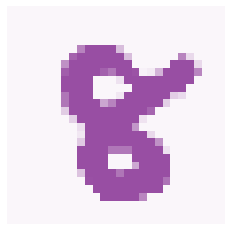

In [7]:
# generate image example
train_loader, _, _ = load_mnist(seed=2)
images, labels = next(iter(train_loader))
images, labels = images.squeeze().numpy(), labels.numpy()

# create a custom colormap
cmap = mpc.LinearSegmentedColormap.from_list("", ['#ffffff', '#984ea3'])

fig = plt.figure()
plt.imshow(images[5], cmap=cmap)
plt.clim(-0.5, 1)
plt.axis('off')
plt.savefig(data_dir + '/reports/figures/paper_figs/figure_1/image.pdf', 
            dpi=300, transparent=True, 
            bbox_inches = 'tight', pad_inches = 0)